In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')

print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above info we can see that there are 14 columns in total.

    There are 13 Independent Variables.
    The Dependent Variable is 'NoShow'

In [5]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### 1. data preprocessing
checking for mismatched datatypes and convert each category appropriately. also, preparing data for modelling, creating logical variables and dropping redundant features

In [ ]:
# PatientId should be int64, not float64

# df['PatientId'] = df['PatientId'].astype('int64')

In [6]:
# "PatientId" and "AppointmentID" columns are random system generated numbers. I'm dropping them.

df = df.drop(['PatientId','AppointmentID'],axis=1)

In [8]:
# Convert ScheduledDay and AppointmentDay to datetime64[ns]

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# lets fix couple column names

df.rename(columns={"Hipertension": "Hypertension","Handcap":"Handicap", "SMS_received": "SMSReceived", 
                       "No-show": "NoShow"},inplace=True)

print(df.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'],
      dtype='object')


In [11]:
# Checking Age

print(sorted(df['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [12]:
df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df[df['Age'] == 115]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
63912,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


"Age" column has negative value and anomalous entries of 115. These entries are outliers in our dataset. we'll remove this entries

In [14]:
# Removing those entries

df = df[(df['Age'] < 115) & (df['Age'] >= 0)]

In [15]:
# also let's check patients with age 0

print(f"Patients with `Age` equal to 0 -> {df[df.Age == 0].shape[0]}")

Patients with `Age` equal to 0 -> 3539


As we have 3539 patients with Age equal to 0 we are assuming that these are the small babies with few months of Age. **Babies don't have Hypertension or Diabetes or Alcoholism.** we will check these features for the above records to see if our assumption is correct.

In [16]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


As we have no records above, it is confirmed that Age value of 0 indeed represents babies who are just few months old.

In [17]:
# printing unique Values for 'ScheduledDay'

print(f"Unique Values in `ScheduledDay` => {np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())}")

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and **that's around 7 months of data.**

In [18]:
# printing unique Values for 'AppointmentDay'

print(f"Unique Values in `AppointmentDay` => {np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())}")

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


From the above detail we can see that AppointmentDay ranges from 2016-04-29 to 2016-06-08. **The AppointmentDay spans just above 1 Month in contrast to the ScheduledDay that spans around 7 Months.**

In [19]:
# now cleaning up "ScheduledDay" and "AppointmentDay" columns

#df_raw['ScheduledMonth'] = df_raw['ScheduledDay'].dt.month
#df_raw['ScheduledDayofWeek'] = df_raw['ScheduledDay'].dt.day_name()
#df_raw['ScheduledHour'] = df_raw['ScheduledDay'].dt.hour

#df_raw['AppointmentMonth'] = df_raw['AppointmentDay'].dt.month
#df_raw['AppointmentDayofWeek'] = df_raw['AppointmentDay'].dt.day_name()
#df_raw['AppointmentHour'] = df_raw['AppointmentDay'].dt.hour

In [21]:
df['AppointmentDayofWeek'] = df['AppointmentDay'].dt.weekday_name
df['ScheduledDayofWeek'] = df['ScheduledDay'].dt.weekday_name

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Print Unique Values

print(f"Unique Values in `Gender` => {df.Gender.unique()}")
print(f"Unique Values in `Scholarship` => {df.Scholarship.unique()}")
print(f"Unique Values in `Hypertension` => {df.Hypertension.unique()}")
print(f"Unique Values in `Diabetes` => {df.Diabetes.unique()}")
print(f"Unique Values in `Alcoholism` => {df.Alcoholism.unique()}")
print(f"Unique Values in `Handicap` => {df.Handicap.unique()}")
print(f"Unique Values in `SMSReceived` => {df.SMSReceived.unique()}")

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]


In [1]:
# From the above detail we can see that except for Handicap which has four values and Gender which has 'M' and 'F' all the other features have 'Yes' or 'No' kind of values. So, we will convert those columns to 'object' type.

In [23]:
#df['Scholarship'] = df['Scholarship'].astype('object')
#df['Hypertension'] = df['Hypertension'].astype('object')
#df['Diabetes'] = df['Diabetes'].astype('object')
#df['Alcoholism'] = df['Alcoholism'].astype('object')
#df['Handicap'] = df['Handicap'].astype('object')
#df['SMSReceived'] = df['SMSReceived'].astype('object')

In [24]:
df.sample(n=5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AppointmentDayofWeek,ScheduledDayofWeek
776,M,2016-04-05,2016-04-29,24,JARDIM DA PENHA,0,0,0,0,0,1,No,Friday,Tuesday
79426,M,2016-05-19,2016-05-19,4,SÃO PEDRO,0,0,0,0,0,0,No,Thursday,Thursday
57851,F,2016-05-13,2016-05-13,0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday
62019,F,2016-05-09,2016-05-09,26,PRAIA DO SUÁ,0,0,0,1,0,0,No,Monday,Monday
102108,F,2016-06-06,2016-06-08,43,MARUÍPE,0,0,0,0,0,0,No,Wednesday,Monday


In [25]:
# calculating waiting Time in Days of the Patients

df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
Gender                  110521 non-null object
ScheduledDay            110521 non-null datetime64[ns]
AppointmentDay          110521 non-null datetime64[ns]
Age                     110521 non-null int64
Neighbourhood           110521 non-null object
Scholarship             110521 non-null int64
Hypertension            110521 non-null int64
Diabetes                110521 non-null int64
Alcoholism              110521 non-null int64
Handicap                110521 non-null int64
SMSReceived             110521 non-null int64
NoShow                  110521 non-null object
AppointmentDayofWeek    110521 non-null object
ScheduledDayofWeek      110521 non-null object
Waiting_Time_days       110521 non-null int64
dtypes: datetime64[ns](2), int64(8), object(5)
memory usage: 13.5+ MB


In [27]:
df.sample(n=10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AppointmentDayofWeek,ScheduledDayofWeek,Waiting_Time_days
19614,F,2016-05-20,2016-05-25,66,ILHA DO PRÍNCIPE,0,1,0,0,0,1,No,Wednesday,Friday,5
51023,F,2016-05-04,2016-05-04,65,FONTE GRANDE,0,1,1,0,0,0,No,Wednesday,Wednesday,0
19871,F,2016-04-28,2016-05-18,21,BELA VISTA,0,0,0,0,0,0,No,Wednesday,Thursday,20
64289,F,2016-05-10,2016-05-10,56,SANTA TEREZA,0,1,0,0,0,0,No,Tuesday,Tuesday,0
93621,F,2016-05-19,2016-06-03,38,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,Friday,Thursday,15
74973,M,2016-05-13,2016-05-30,13,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,Monday,Friday,17
79537,M,2016-05-18,2016-05-18,71,DA PENHA,0,1,0,0,0,0,No,Wednesday,Wednesday,0
101046,F,2016-06-06,2016-06-06,48,SANTA MARTHA,0,1,0,0,0,0,No,Monday,Monday,0
80347,M,2016-05-24,2016-05-24,1,PIEDADE,0,0,0,0,0,0,No,Tuesday,Tuesday,0
94986,F,2016-06-02,2016-06-02,27,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No,Thursday,Thursday,0


In [28]:
# calculating the percentage of patient's showing up and noshow

print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))

noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

NoShow and Show Count of Patients

NoShow
No     88205
Yes    22316
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


## EDA

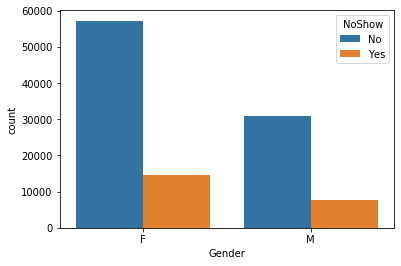

In [29]:
# Show/NoShow for Females and Males

sns.countplot(x='Gender', hue='NoShow', data=df)

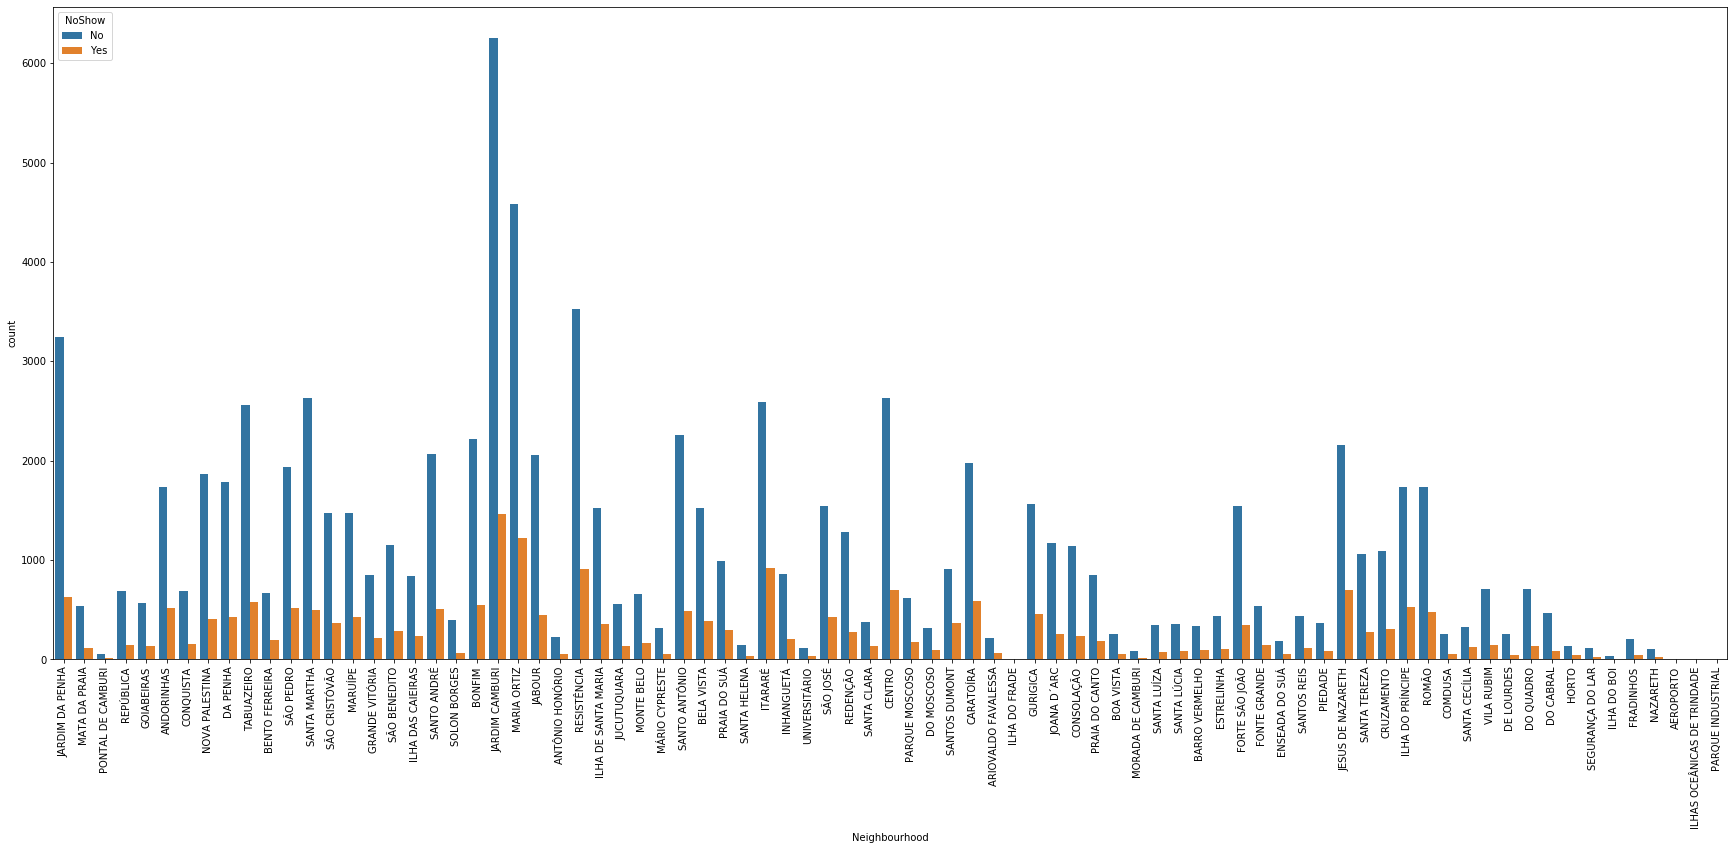

In [30]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='NoShow',data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

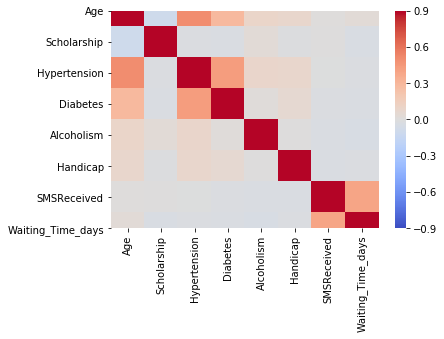

In [56]:
 sns.heatmap(df.corr(), vmin=-0.9, vmax=0.9,cmap='coolwarm')

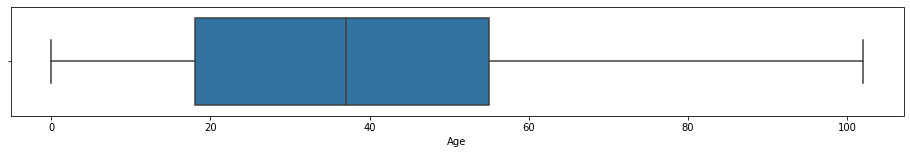

In [32]:
# drawing boxplot for the Age feature to check it's distribution

plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

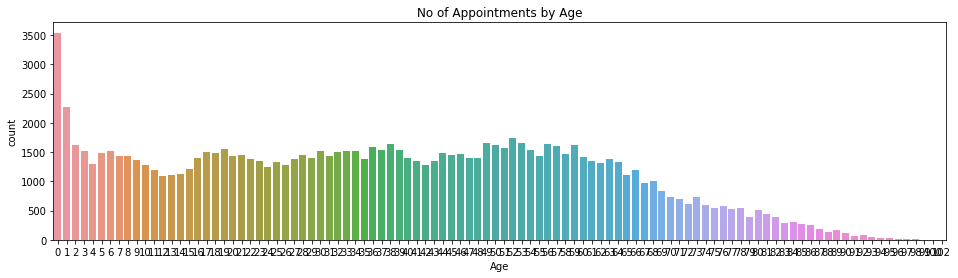

In [33]:
# no. of patients by age

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.

In [34]:
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

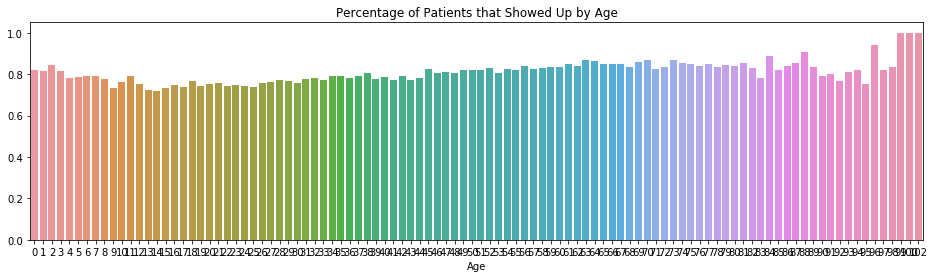

In [35]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

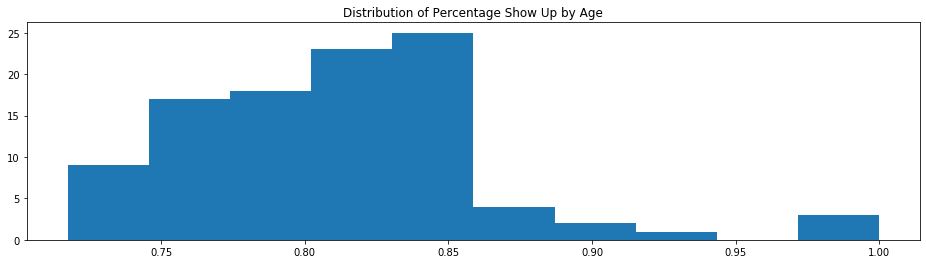

In [36]:
plt.figure(figsize=(16,4))
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

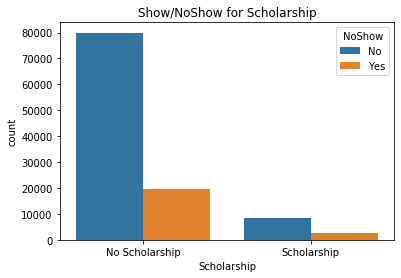

In [37]:
# scholarship

ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [38]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()

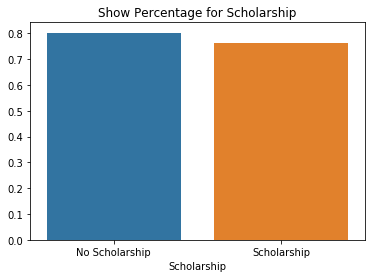

In [39]:
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit.
**Out of the 10,500 patients with Scholarship around 75% of them have come for the visit.**
So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

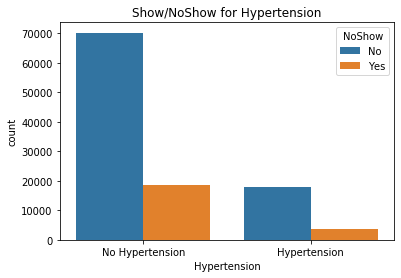

In [40]:
# hypertension

ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [41]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()

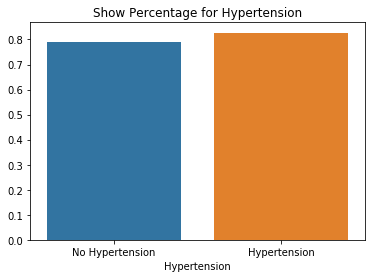

In [42]:
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio)
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit.
**Out of the 22,500 patients with Hypertension around 85% of them have come for the visit.**
So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

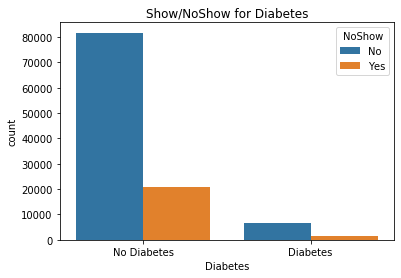

In [43]:
# diabetes

ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [44]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()

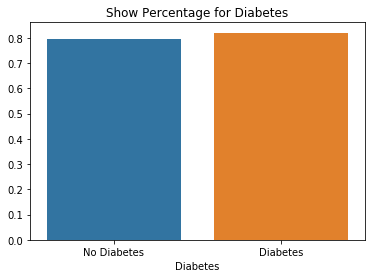

In [45]:
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio)
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.
**Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.**
So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

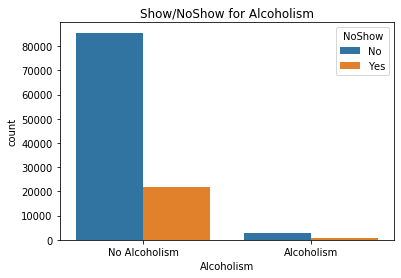

In [46]:
# alcoholism

ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [47]:
df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()

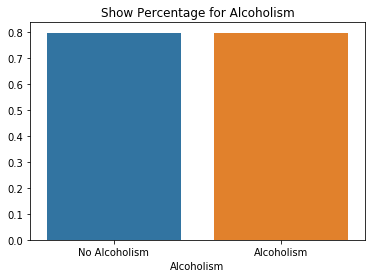

In [48]:
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio)
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit.
Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit.
**As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.**

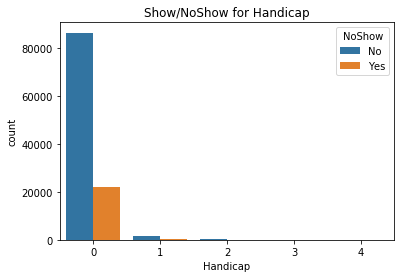

In [49]:
# handicap

ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

In [50]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()

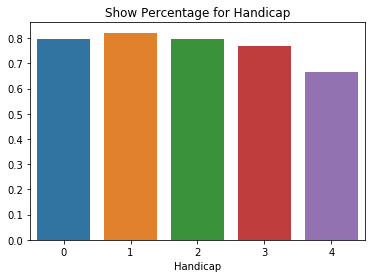

In [51]:
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio)
ax.set_title("Show Percentage for Handicap")
plt.show()

From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.
**As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.**

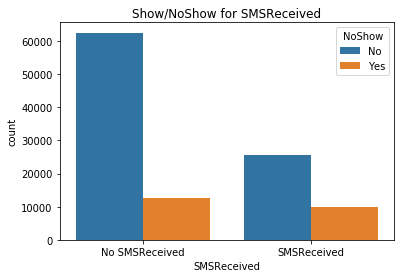

In [52]:
# sms received

ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [53]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()

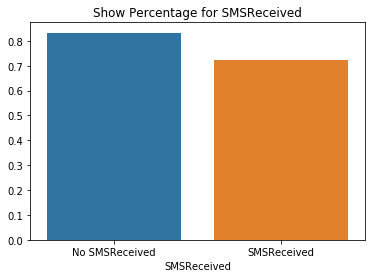

In [54]:
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.
**Out of the 35,500 patients who have received SMS around 72% of them have come for the visit.**
As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

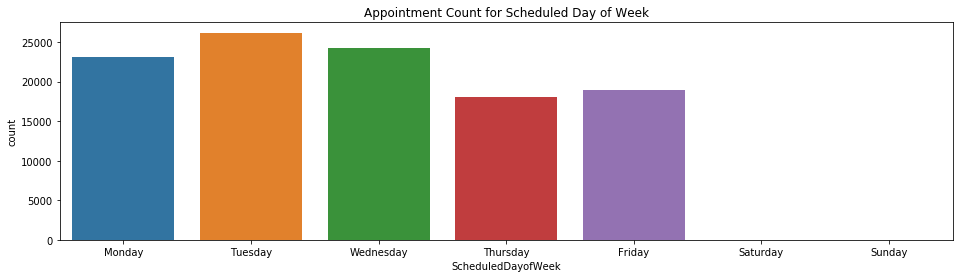

In [55]:
# scheduled day

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDayofWeek, order=week_key)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

Looks like the call center that takes the appointments doesn't work over the weekends **as we do not see any appointments taken on Saturday and Sunday.**

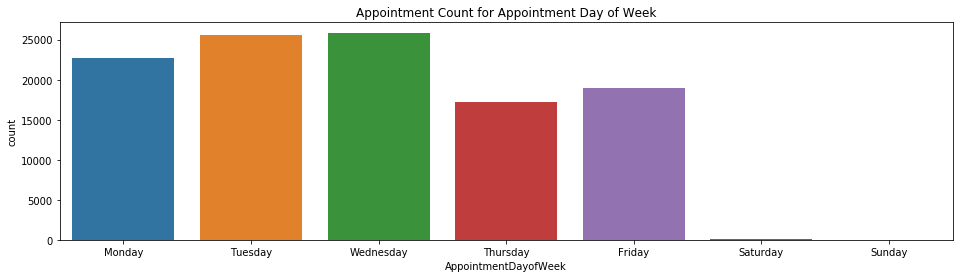

In [57]:
# appointment day

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDayofWeek, order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

There looks like a pattern with the appointments from the above visualizations. Also, **we can see there are very less appointments on Saturday and no appointments on Sunday.**

So, AppointmentDayofWeek could help in determining if a patient visits the hospital after taking an appointment.

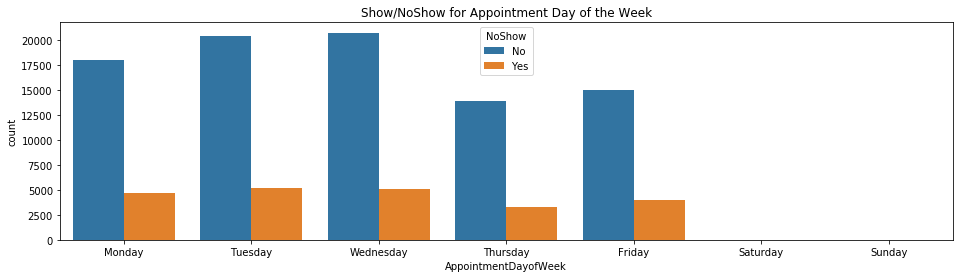

In [59]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDayofWeek, hue=df.NoShow, order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

In [61]:
df_a_dow_ratio = df[df.NoShow == 'No'].groupby(['AppointmentDayofWeek']).size()/df.groupby(['AppointmentDayofWeek']).size()

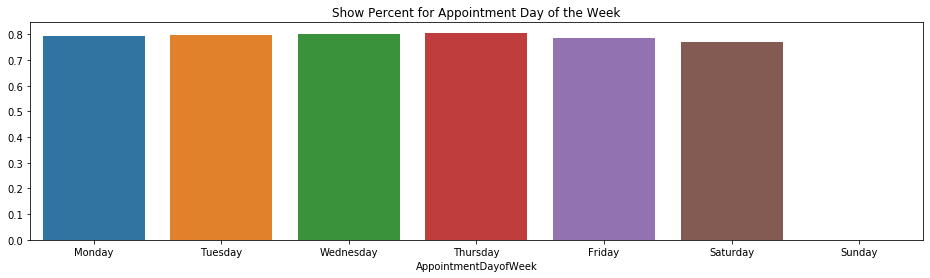

In [62]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=week_key)
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

As we predicted earlier, we do not see a clear pattern in the patients visits based on the week day. **But we can observe that on Saturday's the percentage of visits is less.** So, AppointmentDayofWeek can help us in predicting the visits by a small number.

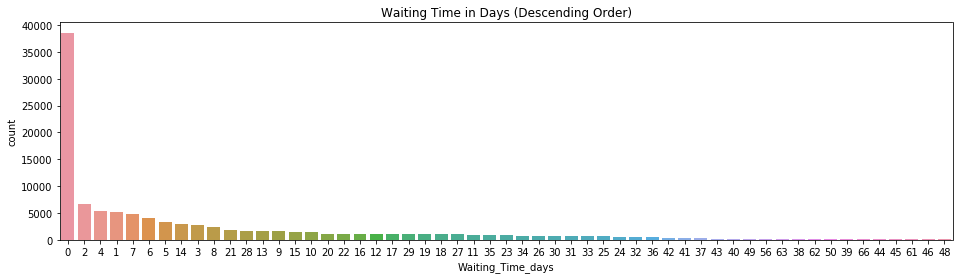

In [63]:
# waiting time

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

**From the above visualization we can see that most of the patients are booking their appointments on the same day.** The next highest waiting times are 2days, 4 days and 1 day.

In [ ]:
#plt.figure(figsize=(16,4))
#ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
#ax.set_title("Waiting Time in Days (Ascending Order)")
#plt.show()

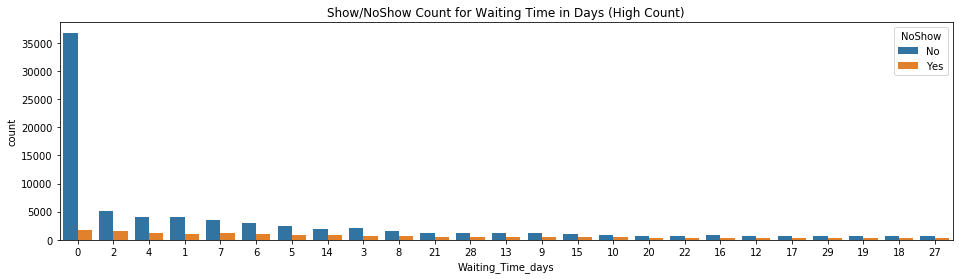

In [65]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

In [ ]:
#plt.figure(figsize=(16,4))
#ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
#ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
#plt.show()

In [ ]:
# we will visualize the last few rows (High WaitTime) for the Waiting_Time_days column.

#plt.figure(figsize=(16,4))
#ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400])
#ax.set_title("Descending Waiting Time in Days")
#plt.show()

In [ ]:
#plt.figure(figsize=(16,4))
#ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
#ax.set_title("Show/NoShow - Descending Waiting Time in Days")
#plt.show()

In [71]:
df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

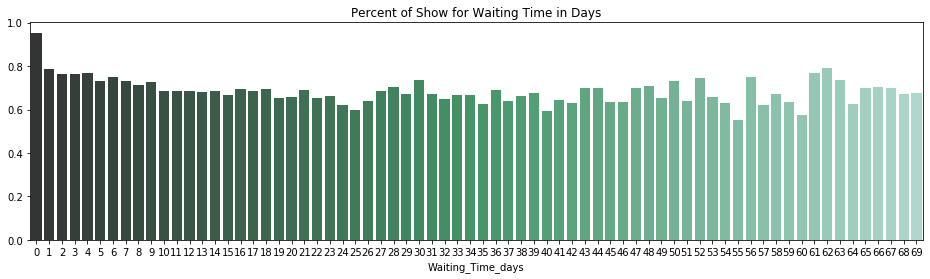

In [72]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

**From the above visualization we can see that around 95% of the patients who have booked their appointments on the same day and visiting the hospital without fail.** Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days.

**As we have a clear distinction for the patients Show/NoShow with the Waiting_Time_days, this feature could help us with a better prediction.**

## Model building

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
Gender                  110521 non-null object
ScheduledDay            110521 non-null datetime64[ns]
AppointmentDay          110521 non-null datetime64[ns]
Age                     110521 non-null int64
Neighbourhood           110521 non-null object
Scholarship             110521 non-null int64
Hypertension            110521 non-null int64
Diabetes                110521 non-null int64
Alcoholism              110521 non-null int64
Handicap                110521 non-null int64
SMSReceived             110521 non-null int64
NoShow                  110521 non-null object
AppointmentDayofWeek    110521 non-null object
ScheduledDayofWeek      110521 non-null object
Waiting_Time_days       110521 non-null int64
dtypes: datetime64[ns](2), int64(8), object(5)
memory usage: 18.5+ MB


In [77]:
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Use LabelEncoder to encode labels with value between 0 and n_classes-1.
le = LabelEncoder()


#Gender
df['Gender'] = le.fit_transform(df['Gender'])

#Neighbourhood
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

#ScheduledDay_DOW
df['ScheduledDayofWeek'] = le.fit_transform(df['ScheduledDayofWeek'])

#AppointmentDay_DOW
df['AppointmentDayofWeek'] = le.fit_transform(df['AppointmentDayofWeek'])

#NoShow
df['NoShow'] = le.fit_transform(df['NoShow'])

In [80]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [81]:
df.sample(n=10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AppointmentDayofWeek,ScheduledDayofWeek,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
44659,0,3,35,0,0,0,0,0,0,0,4,4,0,2016,5,10,2016,5,10
6680,0,20,68,0,0,0,0,0,0,1,0,5,2,2016,5,11,2016,5,13
35058,1,16,25,0,0,0,0,0,0,0,1,1,0,2016,5,2,2016,5,2
81638,0,52,78,0,1,0,0,0,0,0,4,4,0,2016,5,10,2016,5,10
59836,1,48,30,0,0,0,0,0,1,1,4,5,27,2016,4,27,2016,5,24
46455,0,68,43,0,0,0,0,0,0,0,4,0,32,2016,4,15,2016,5,17
47629,0,71,44,0,1,1,0,0,0,0,4,4,0,2016,5,31,2016,5,31
91214,0,2,43,0,0,0,0,0,0,0,1,1,0,2016,6,6,2016,6,6
34275,0,40,68,0,0,0,0,0,0,0,5,5,0,2016,5,18,2016,5,18
39893,1,50,35,0,0,0,0,0,0,0,0,4,3,2016,5,10,2016,5,13


In [82]:
# Get the Dependent and Independent Features.

X = df.drop(['NoShow'], axis=1)
y = df['NoShow']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Decision Tree classifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [89]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print(f"{name} -- {importance:.2f}")

Feature Importance:

Gender -- 0.23
Age -- 0.23
Neighbourhood -- 0.17
Scholarship -- 0.08
Hypertension -- 0.08
Diabetes -- 0.05
Alcoholism -- 0.05
Handicap -- 0.04
SMSReceived -- 0.02
AppointmentDayofWeek -- 0.02
ScheduledDayofWeek -- 0.01
Waiting_Time_days -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.00
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [90]:
dt_clf.score(X_test, y_test)

0.7215972494495884

In [91]:
# Random forest classifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print(f"{name} -- {importance:.2f}")

Feature Importance:

Gender -- 0.29
Age -- 0.25
Neighbourhood -- 0.13
Scholarship -- 0.07
Hypertension -- 0.06
Diabetes -- 0.04
Alcoholism -- 0.03
Handicap -- 0.03
SMSReceived -- 0.02
AppointmentDayofWeek -- 0.01
ScheduledDayofWeek -- 0.01
Waiting_Time_days -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [93]:
rf_clf.score(X_test, y_test)

0.7797448502578641

''' Grid Search helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. '''

In [94]:
# grid search cv

params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   45.8s finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.7980836221170637


### Conclusion
From the above feature importance, we could see that Gender, Age, Scholarship and Hypertension are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.

In addition, specialty of the consultation doctor in the dataset could have helped us a lot in making better analysis and predictions for the NoShow of a patient.